In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('CO2_emission.csv')
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


## Preprocessing Data ##

In [4]:
features_one_hot = pd.get_dummies(data = df, columns=['Make', 'Model', 'Vehicle_Class', 'Transmission'], drop_first=True)

In [5]:
features_one_hot = features_one_hot.astype('float64', errors= 'ignore')

In [6]:
features_one_hot.head()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level,Make_Alfa Romeo,Make_Aston Martin,...,Transmission_AS9,Transmission_AV,Transmission_AV1,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
0,2021.0,2.4,4.0,9.9,7.0,8.6,199.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021.0,3.5,6.0,11.1,10.8,11.0,256.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021.0,2.0,4.0,11.0,8.6,9.9,232.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021.0,2.0,4.0,11.3,9.1,10.3,242.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021.0,2.0,4.0,11.2,8.0,9.8,230.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
features_one_hot.corr()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level,Make_Alfa Romeo,Make_Aston Martin,...,Transmission_AS9,Transmission_AV,Transmission_AV1,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
Model_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine_Size,NaN,1.000000,0.918483,0.833345,0.748928,0.817541,0.825725,-0.504544,-0.052979,0.068631,...,-0.013378,-0.198386,-0.066827,-0.041398,-0.051573,-0.071928,-0.089084,-0.083209,-0.088434,-0.023946
Cylinders,NaN,0.918483,1.000000,0.842551,0.742968,0.821770,0.834972,-0.532742,-0.042694,0.147073,...,-0.026879,-0.196580,-0.056933,-0.042694,-0.063459,-0.064656,-0.110908,-0.071108,-0.125915,-0.008032
Fuel_Consumption_in_City(L/100 km),NaN,0.833345,0.842551,1.000000,0.926625,0.991267,0.966137,-0.573210,-0.023026,0.064593,...,-0.015869,-0.334103,-0.095415,-0.097579,-0.134788,-0.100416,-0.107657,-0.078230,-0.074128,0.038382
Fuel_Consumption_in_City_Hwy(L/100 km),NaN,0.748928,0.742968,0.926625,1.000000,0.967835,0.933468,-0.490750,-0.029860,0.053602,...,-0.010287,-0.291876,-0.096375,-0.100623,-0.087329,-0.106006,-0.099143,-0.082977,-0.119676,0.058089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Transmission_AV7,NaN,-0.071928,-0.064656,-0.100416,-0.106006,-0.103716,-0.107312,0.000068,-0.008769,-0.008769,...,-0.013452,-0.023366,-0.007152,-0.008769,-0.010757,1.000000,-0.013932,-0.008000,-0.030314,-0.010757
Transmission_AV8,NaN,-0.089084,-0.110908,-0.107657,-0.099143,-0.106064,-0.108368,0.015456,-0.010262,-0.010262,...,-0.015743,-0.027345,-0.008370,-0.010262,-0.012588,-0.013932,1.000000,-0.009363,-0.035476,-0.012588
Transmission_M5,NaN,-0.083209,-0.071108,-0.078230,-0.082977,-0.081377,-0.084163,0.046011,-0.005893,-0.005893,...,-0.009040,-0.015702,-0.004806,-0.005893,-0.007229,-0.008000,-0.009363,1.000000,-0.020371,-0.007229
Transmission_M6,NaN,-0.088434,-0.125915,-0.074128,-0.119676,-0.090929,-0.092353,-0.042784,-0.022328,-0.022328,...,-0.034254,-0.059498,-0.018211,-0.022328,-0.027390,-0.030314,-0.035476,-0.020371,1.000000,-0.027390


## Exploratory Data Analysis ##

In [8]:
df.corr()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
Model_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine_Size,NaN,1.000000,0.918483,0.833345,0.748928,0.817541,0.825725,-0.504544
Cylinders,NaN,0.918483,1.000000,0.842551,0.742968,0.821770,0.834972,-0.532742
Fuel_Consumption_in_City(L/100 km),NaN,0.833345,0.842551,1.000000,0.926625,0.991267,0.966137,-0.573210
Fuel_Consumption_in_City_Hwy(L/100 km),NaN,0.748928,0.742968,0.926625,1.000000,0.967835,0.933468,-0.490750
Fuel_Consumption_comb(L/100km),NaN,0.817541,0.821770,0.991267,0.967835,1.000000,0.971241,-0.555426
CO2_Emissions,NaN,0.825725,0.834972,0.966137,0.933468,0.971241,1.000000,-0.583690
Smog_Level,NaN,-0.504544,-0.532742,-0.573210,-0.490750,-0.555426,-0.583690,1.000000


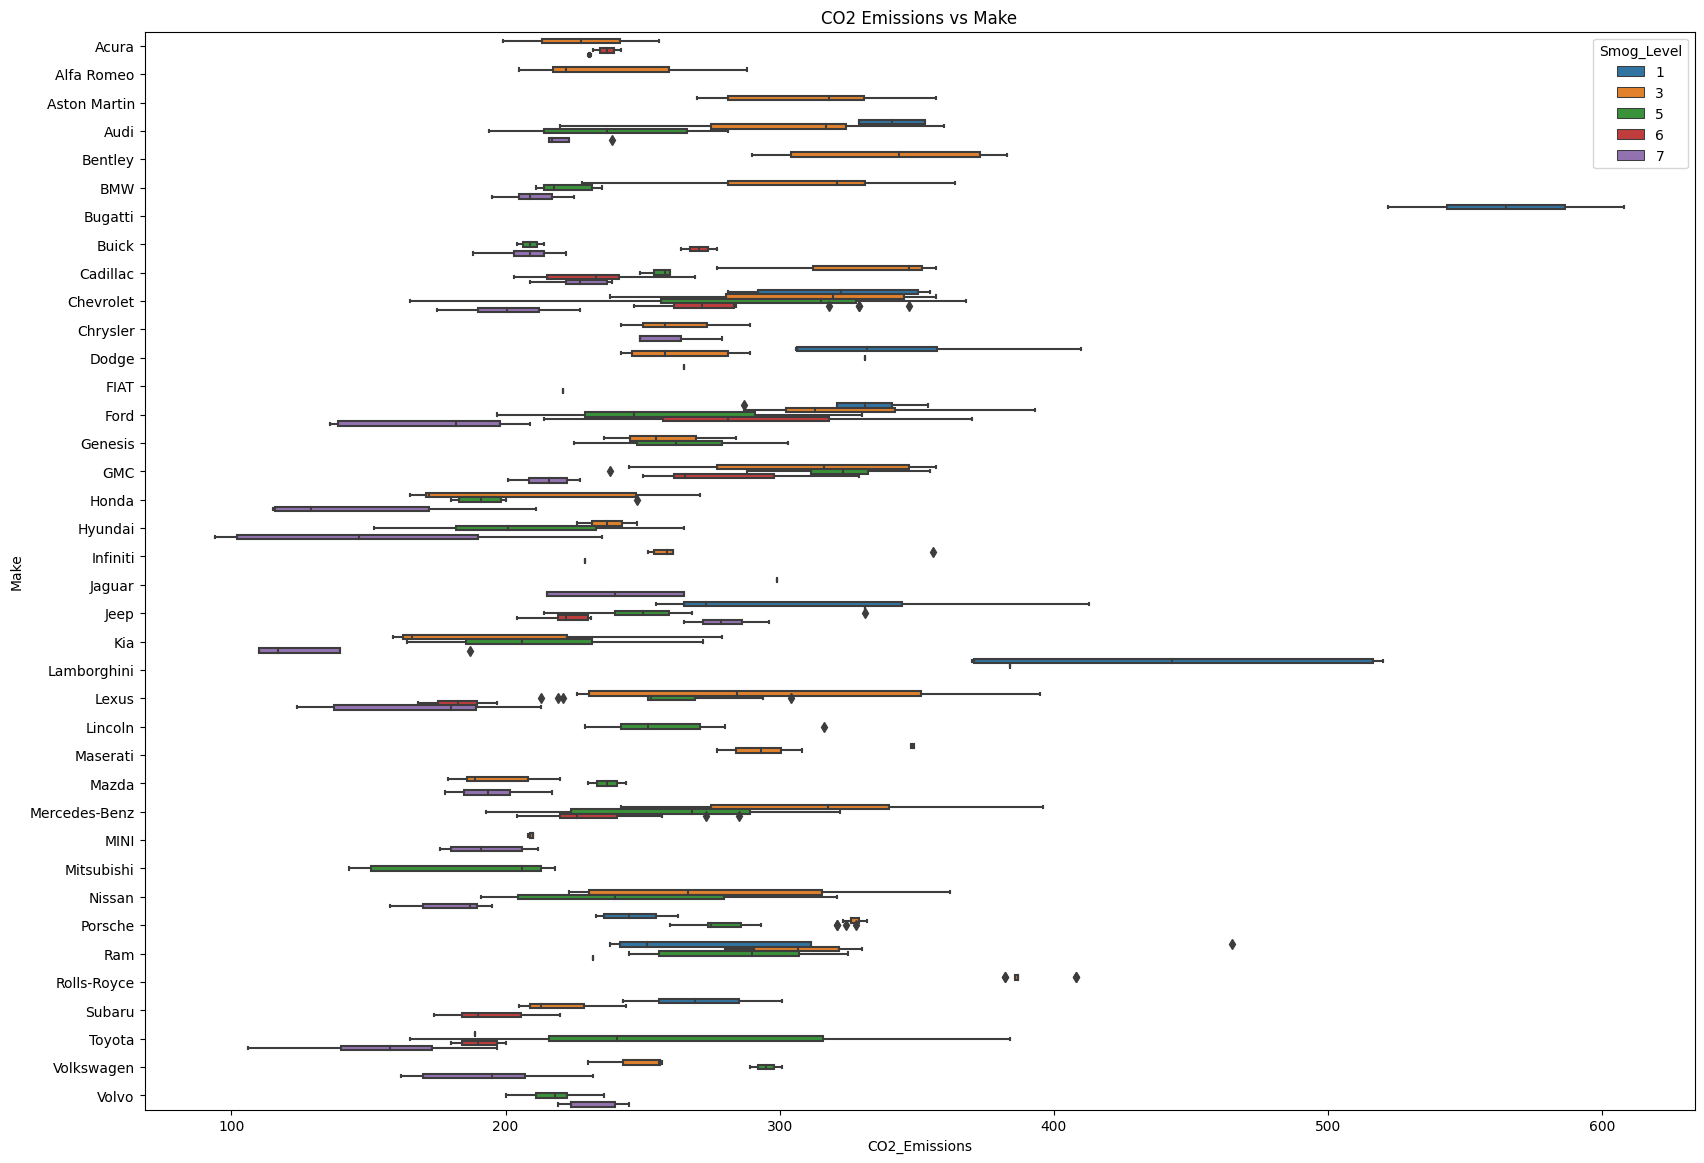

In [9]:
fig = plt.figure(figsize=(20,14))
sns.boxplot(data=df, x='CO2_Emissions', y='Make', hue = 'Smog_Level')
plt.title("CO2 Emissions vs Make")
plt.show()

Text(0.5, 1.0, 'CO2_Emissions vs Transmission')

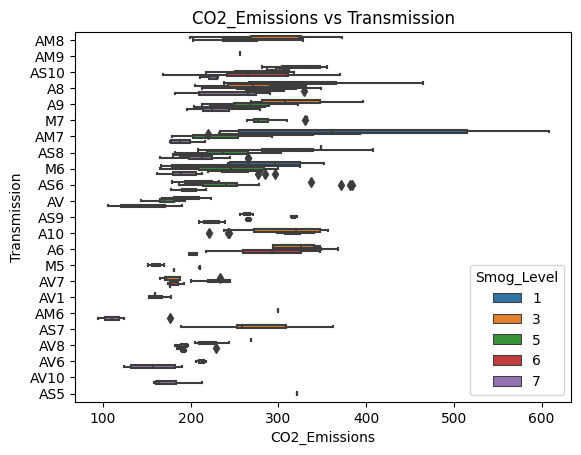

In [10]:
sns.boxplot(data = df, x='CO2_Emissions', y='Transmission', hue = 'Smog_Level')
plt.title("CO2_Emissions vs Transmission")

Text(0.5, 1.0, 'CO2_Emissions vs Vehicle Class')

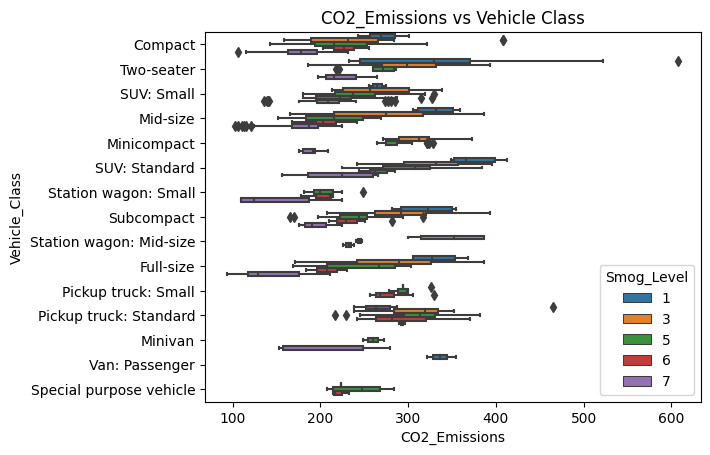

In [11]:
sns.boxplot(data = df, x='CO2_Emissions', y = 'Vehicle_Class', hue = 'Smog_Level')
plt.title('CO2_Emissions vs Vehicle Class')

Text(0.5, 1.0, 'Cylinders vs Make')

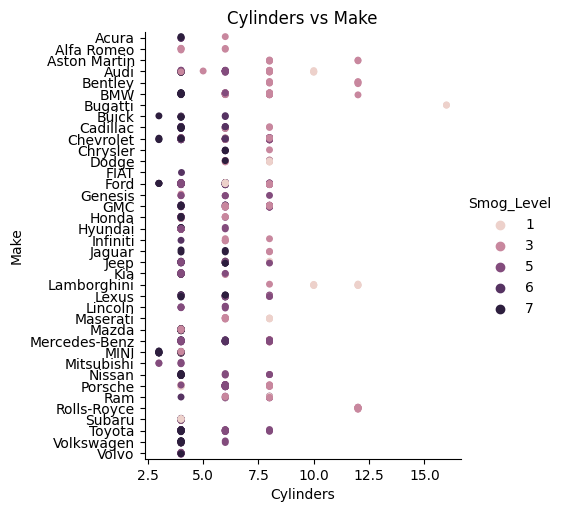

In [12]:
sns.catplot(data=df, x='Cylinders', y = 'Make', hue ='Smog_Level')
plt.title("Cylinders vs Make")

<Figure size 2000x1400 with 0 Axes>

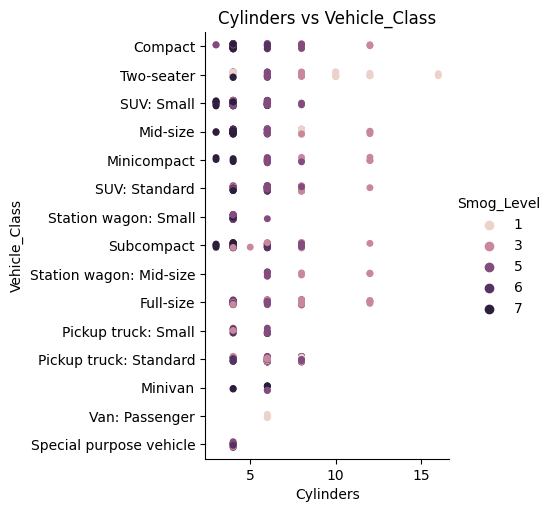

In [13]:
fig = plt.figure(figsize=(20,14))
sns.catplot(data=df, x='Cylinders', y = 'Vehicle_Class', hue ='Smog_Level')
plt.title('Cylinders vs Vehicle_Class')
plt.show()

Text(0.5, 1.0, 'Model Year vs Smog Level')

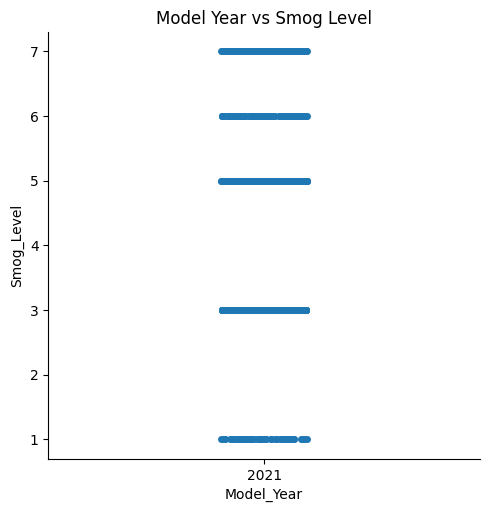

In [14]:
sns.catplot(data = df, x = 'Model_Year',  y = 'Smog_Level')
plt.title('Model Year vs Smog Level')

In [15]:
df.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [16]:
df.columns

Index(['Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_Consumption_in_City(L/100 km)',
       'Fuel_Consumption_in_City_Hwy(L/100 km)',
       'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions', 'Smog_Level'],
      dtype='object')

Text(0.5, 1.0, 'Hwy Fuel Comsumptions vs CO2 Emissions')

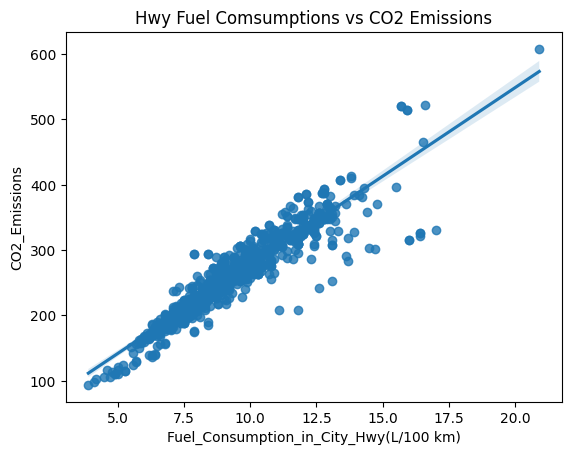

In [17]:
sns.regplot(data = df, x = 'Fuel_Consumption_in_City_Hwy(L/100 km)', y = 'CO2_Emissions')
plt.title('Hwy Fuel Comsumptions vs CO2 Emissions')

Text(0.5, 1.0, 'Cylinders vs CO2 Emissions')

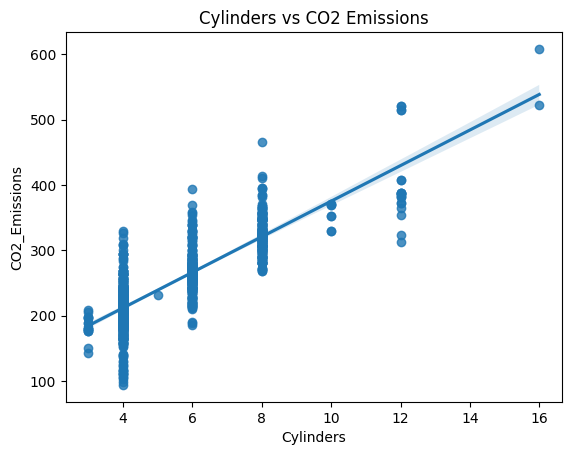

In [18]:
sns.regplot(data = df, x='Cylinders', y = 'CO2_Emissions', )
plt.title('Cylinders vs CO2 Emissions')

Text(0.5, 1.0, 'City Fuel Consumption vs CO2 Emissions')

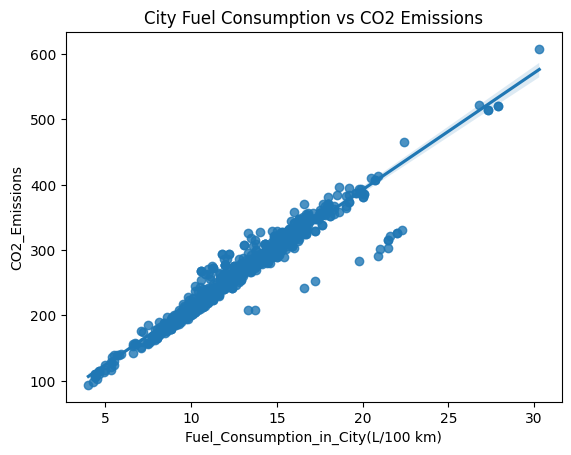

In [19]:
sns.regplot(data = df, x = 'Fuel_Consumption_in_City(L/100 km)', y = 'CO2_Emissions')
plt.title('City Fuel Consumption vs CO2 Emissions')

Text(0.5, 1.0, 'Combined Fuel Consumption vs CO2 Emissions')

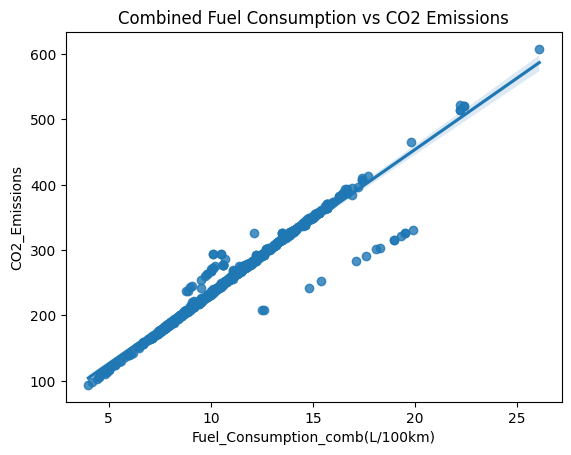

In [20]:
sns.regplot(data = df, x = 'Fuel_Consumption_comb(L/100km)', y = 'CO2_Emissions')
plt.title("Combined Fuel Consumption vs CO2 Emissions")

In [21]:
df.columns

Index(['Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_Consumption_in_City(L/100 km)',
       'Fuel_Consumption_in_City_Hwy(L/100 km)',
       'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions', 'Smog_Level'],
      dtype='object')

In [22]:
print(df.isna().sum(), df.isnull().sum())

Model_Year                                0
Make                                      0
Model                                     0
Vehicle_Class                             0
Engine_Size                               0
Cylinders                                 0
Transmission                              0
Fuel_Consumption_in_City(L/100 km)        0
Fuel_Consumption_in_City_Hwy(L/100 km)    0
Fuel_Consumption_comb(L/100km)            0
CO2_Emissions                             0
Smog_Level                                0
dtype: int64 Model_Year                                0
Make                                      0
Model                                     0
Vehicle_Class                             0
Engine_Size                               0
Cylinders                                 0
Transmission                              0
Fuel_Consumption_in_City(L/100 km)        0
Fuel_Consumption_in_City_Hwy(L/100 km)    0
Fuel_Consumption_comb(L/100km)            0
CO2_Emissions      

### P-Value ###

In [23]:
from scipy import stats

CO2 Emissions vs Smog Levels

In [24]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['CO2_Emissions'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.5836896276571151 with a P-value of P =  1.794873409997831e-86


Cylinders vs Smog Level

In [25]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Cylinders'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.5327421258959758 with a P-value of P =  1.1447246550912013e-69


Engine Size vs Smog Level

In [26]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Engine_Size'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.5045441452332151 with a P-value of P =  1.5554364924909638e-61


Comb Fuel Consumption vs Smog Level

In [27]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Fuel_Consumption_comb(L/100km)'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.5554261851226567 with a P-value of P =  8.605758006540114e-77


City Fuel Consumption vs Smog Level

In [28]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Fuel_Consumption_in_City(L/100 km)'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.5732100061649238 with a P-value of P =  8.985832582187064e-83


Hwy Fuel Consumption vs Smog Level

In [29]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Fuel_Consumption_in_City_Hwy(L/100 km)'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.490750133798013 with a P-value of P =  7.96548141447075e-58


Makes vs Smog_Level

In [30]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Make_Alfa Romeo'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.08106923335797736 with a P-value of P =  0.013149934095244861


In [31]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Make_Aston Martin'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.08106923335797736 with a P-value of P =  0.013149934095244861


In [32]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Make_Audi'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.048418457147233813 with a P-value of P =  0.13902926411659355


Models vs Smog Level

In [33]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Model_1500 4X4 EcoDiesel'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.07125075582993032 with a P-value of P =  0.029365559163681717


In [34]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Model_1500 4X4 TRX'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.0712507558299303 with a P-value of P =  0.029365559163681717


In [35]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Model_230i xDrive Cabriolet'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.04347850370104253 with a P-value of P =  0.18407064285704097


Transmission vs Smog Level

In [36]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Transmission_AV10'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.1067863631468774 with a P-value of P =  0.0010744266869660054


In [37]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Transmission_AV6'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.09258980757508031 with a P-value of P =  0.004604259620786258


In [38]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Transmission_M7'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.0029713085246661306 with a P-value of P =  0.9277034389987306


Vehicle Class vs Smog Level

In [39]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Vehicle_Class_Special purpose vehicle'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.024336771441843423 with a P-value of P =  0.4573129076397338


In [40]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Vehicle_Class_Two-seater'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.26515308940165305 with a P-value of P =  1.6520950849003776e-16


In [41]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Vehicle_Class_Full-size'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.08896662914051806 with a P-value of P =  0.006485644902320406


In [42]:
pearson_ceof, p_value = stats.pearsonr(features_one_hot['Vehicle_Class_Minicompact'], features_one_hot['Smog_Level'])
print("The Pearson Correlation Coefficient is", pearson_ceof, "with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.02913138081987165 with a P-value of P =  0.3735894602169733


 ### ANOVA ###

In [43]:
df_gptest = df[['Make', 'Model', 'Vehicle_Class', 'Transmission', 'Smog_Level']]

In [44]:
group_test = df_gptest[['Make', 'Smog_Level']].groupby(['Make'])
group_test.head()

,Make,Smog_Level
0,Acura,3
1,Acura,3
2,Acura,6
3,Acura,6
4,Acura,7
...,...,...
922,Volvo,5
923,Volvo,5
924,Volvo,7
925,Volvo,7


#### Make vs Smog Level ####

In [45]:
f_val, p_val = stats.f_oneway(group_test.get_group('Volvo')['Smog_Level'], group_test.get_group('Acura')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.4473684210526316 , P = 0.5125685386023264


In [46]:
f_val, p_val = stats.f_oneway(group_test.get_group('Audi')['Smog_Level'], group_test.get_group('Aston Martin')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 4.424168936313099 , P = 0.04081329640478334


In [47]:
f_val, p_val = stats.f_oneway(group_test.get_group('Bentley')['Smog_Level'], group_test.get_group('BMW')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 3.7607883944420633 , P = 0.05717421425258327


In [48]:
f_val, p_val = stats.f_oneway(group_test.get_group('Bugatti')['Smog_Level'], group_test.get_group('Buick')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 69.81818181818198 , P = 1.561019703408128e-05


#### Model vs Smog Level ####

In [49]:
group_test = df_gptest[['Model', 'Smog_Level']].groupby(['Model'])
group_test.head()

,Model,Smog_Level
0,ILX,3
1,NSX,3
2,RDX SH-AWD,6
3,RDX SH-AWD A-SPEC,6
4,TLX SH-AWD,7
...,...,...
930,XC40 T5 AWD,5
931,XC60 T5 AWD,5
932,XC60 T6 AWD,7
933,XC90 T5 AWD,5


In [50]:
f_val, p_val = stats.f_oneway(group_test.get_group('DB11 AMR')['Smog_Level'], group_test.get_group('ILX')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= nan , P = nan


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:3869: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


In [51]:
f_val, p_val = stats.f_oneway(group_test.get_group('230i xDrive Cabriolet')['Smog_Level'], group_test.get_group('M2 Competition')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= inf , P = 0.0


/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:3895: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [52]:
f_val, p_val = stats.f_oneway(group_test.get_group('Corolla')['Smog_Level'], group_test.get_group('Camry')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.6 , P = 0.49502534605971094


In [53]:
f_val, p_val = stats.f_oneway(group_test.get_group('Challenger')['Smog_Level'], group_test.get_group('Charger')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.9999999999999999 , P = 0.42264973081037427


In [54]:
f_val, p_val = stats.f_oneway(group_test.get_group('Accord')['Smog_Level'], group_test.get_group('Pilot AWD')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= nan , P = nan


In [55]:
f_val, p_val = stats.f_oneway(group_test.get_group('A6 Sedan 45 TFSI quattro')['Smog_Level'], group_test.get_group('Q3 40 TFSI quattro')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= nan , P = nan


#### Transmission vs Smog Level ####

In [56]:
group_test = df_gptest[['Transmission', 'Smog_Level']].groupby(['Transmission'])
group_test.head()

,Transmission,Smog_Level
0,AM8,3
1,AM9,3
2,AS10,6
3,AS10,6
4,AS10,7
...,...,...
857,AS5,5
858,AS5,5
874,AV10,7
875,AV10,7


In [57]:
f_val, p_val = stats.f_oneway(group_test.get_group('AM8')['Smog_Level'], group_test.get_group('AM9')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 1.8474074074074074 , P = 0.1811714771845422


In [58]:
f_val, p_val = stats.f_oneway(group_test.get_group('M7')['Smog_Level'], group_test.get_group('M6')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.16272997472245626 , P = 0.687818686326616


In [59]:
f_val, p_val = stats.f_oneway(group_test.get_group('AV')['Smog_Level'], group_test.get_group('A6')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 32.941022867161564 , P = 1.900907767652741e-07


In [60]:
f_val, p_val = stats.f_oneway(group_test.get_group('AV1')['Smog_Level'], group_test.get_group('AV8')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.2294545164124271 , P = 0.6380320978693244


In [61]:
f_val, p_val = stats.f_oneway(group_test.get_group('AV6')['Smog_Level'], group_test.get_group('AS5')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 3.272727272727273 , P = 0.10388813106210162


#### Vehicle Class vs Smog Level ####

In [62]:
group_test = df_gptest[['Vehicle_Class', 'Smog_Level']].groupby(['Vehicle_Class'])
group_test.head()

,Vehicle_Class,Smog_Level
0,Compact,3
1,Two-seater,3
2,SUV: Small,6
3,SUV: Small,6
4,Compact,7
...,...,...
531,Station wagon: Small,7
536,Minivan,5
649,Station wagon: Mid-size,6
651,Station wagon: Mid-size,3


In [63]:
f_val, p_val = stats.f_oneway(group_test.get_group('Compact')['Smog_Level'], group_test.get_group('Two-seater')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 50.77360260556413 , P = 5.37176651052796e-11


In [64]:
f_val, p_val = stats.f_oneway(group_test.get_group('Mid-size')['Smog_Level'], group_test.get_group('Minicompact')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.5120586198938383 , P = 0.4754240463912629


In [65]:
f_val, p_val = stats.f_oneway(group_test.get_group('SUV: Standard')['Smog_Level'], group_test.get_group('Subcompact')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 4.614001878992319 , P = 0.03286814719704146


In [66]:
f_val, p_val = stats.f_oneway(group_test.get_group('Pickup truck: Standard')['Smog_Level'], group_test.get_group('Minivan')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 11.456231256332755 , P = 0.0009633490160262012


In [67]:
f_val, p_val = stats.f_oneway(group_test.get_group('Full-size')['Smog_Level'], group_test.get_group('Special purpose vehicle')['Smog_Level'])
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 3.7673160173160145 , P = 0.055971476960523264


In [68]:
df['Vehicle_Class'].unique()

array(['Compact', 'Two-seater', 'SUV: Small', 'Mid-size', 'Minicompact',
       'SUV: Standard', 'Station wagon: Small', 'Subcompact',
       'Station wagon: Mid-size', 'Full-size', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Special purpose vehicle'], dtype=object)

## Models ##

### Classification ###

#### Decision Tree ####

In [69]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [70]:
Y = features_one_hot['Smog_Level'].to_numpy()
X = features_one_hot.drop(columns = ['Smog_Level']).to_numpy()
X = StandardScaler().fit_transform(X.astype(float))
Y.shape, X.shape

((935,), (935, 782))

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((748, 782), (187, 782))

In [72]:
tree_pipe = Pipeline([('scaler', StandardScaler()), ('tree', DecisionTreeClassifier())])
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier())])

In [73]:
tree_pipe.score(X_test, y_test)

0.8021390374331551

In [74]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt', 'log2'],
     'min_samples_leaf': [1, 2, 4, 8],
     'min_samples_split': [2, 4, 8, 10],
     'ccp_alpha' : [0.1, 0.5, 0.01, 0.05]}

tree = DecisionTreeClassifier()

In [75]:
tree_cv = GridSearchCV(estimator = tree, param_grid = parameters, cv=10, scoring = 'accuracy', n_jobs = -1, verbose = 3)
tree_cv.fit(X_train, y_train)

Fitting 10 folds for each of 6912 candidates, totalling 69120 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.5, 0.01, 0.05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 8, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [76]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.5480900900900901


In [77]:
tree_cv.score(X_test, y_test)

0.48663101604278075

In [78]:
y_hat = tree_pipe.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

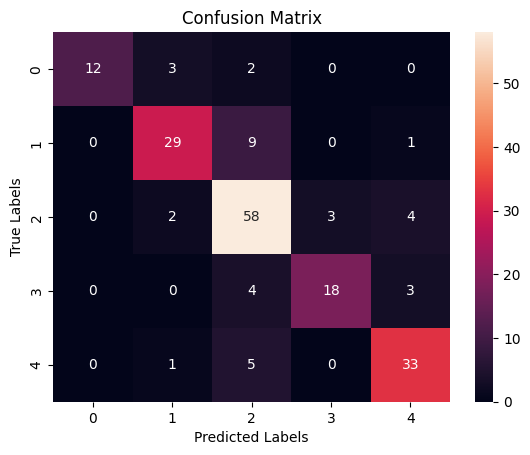

In [79]:
cm = confusion_matrix(y_test, y_hat)
ax = plt.subplot()
sns.heatmap(cm , annot = True, ax = ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

#### KNN ####

In [80]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
knn = KNeighborsClassifier()

In [81]:
knn_cv = GridSearchCV(estimator = knn, param_grid = parameters, cv = 10, scoring = 'accuracy', n_jobs = -1, verbose = 3)
knn_cv.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]},
             scoring='accuracy', verbose=3)

In [82]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy : 0.5346846846846847


In [83]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.3422459893048128

In [84]:
y_hat = knn_cv.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

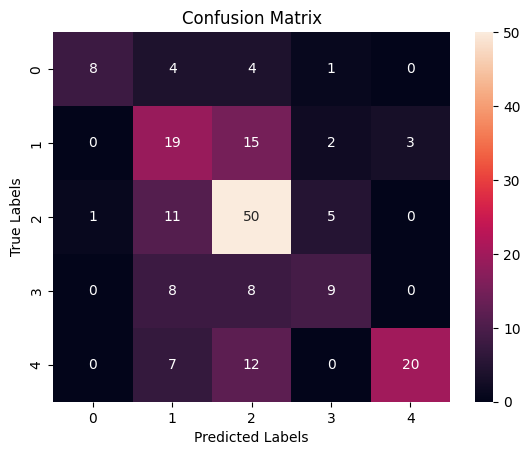

In [85]:
cm = confusion_matrix(y_test, y_hat)
ax = plt.subplot()
sns.heatmap(cm , annot = True, ax = ax)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

In [86]:
print("Tree\t\t{}\t\t{}".format((tree_cv.best_score_).round(5), tree_cv.score(X_test, y_test).round(5)))
print("KNN\t\t{}\t\t{}".format((knn_cv.best_score_).round(5), knn_cv.score(X_test, y_test).round(5)))

comparison = {}

comparison['Tree'] = {'Accuracy': tree_cv.best_score_.round(5), 'TestAccuracy': tree_cv.score(X_test, y_test).round(5)}
comparison['KNN'] = {'Accuracy': knn_cv.best_score_.round(5), 'TestAccuracy': knn_cv.score(X_test, y_test).round(5)}

Tree		0.54809		0.48663
KNN		0.53468		0.56684


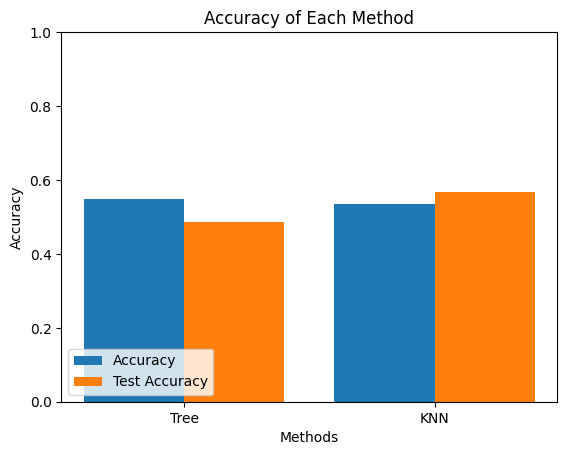

In [87]:
x = []
y1 = []
y2 = []
for meth in comparison.keys():
    x.append(meth)    
    y1.append(comparison[meth]['Accuracy'])
    y2.append(comparison[meth]['TestAccuracy'])
    

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y1, 0.4, label = 'Accuracy')
plt.bar(x_axis + 0.2, y2, 0.4, label = 'Test Accuracy')

plt.ylim([0,1])
plt.xticks(x_axis, x)

plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Accuracy of Each Method")
plt.legend(loc='lower left')
plt.show()

### Regression ###

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [89]:
df.columns

Index(['Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_Consumption_in_City(L/100 km)',
       'Fuel_Consumption_in_City_Hwy(L/100 km)',
       'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions', 'Smog_Level'],
      dtype='object')

In [90]:
X = df[['Engine_Size', 'Cylinders', 'Fuel_Consumption_in_City(L/100 km)', 'Fuel_Consumption_in_City_Hwy(L/100 km)', 'Fuel_Consumption_comb(L/100km)', 'Smog_Level']].to_numpy()
Y = df['CO2_Emissions'].to_numpy()
X = X.astype('float64')
X.shape, Y.shape

((935, 6), (935,))

In [91]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

#### Linear Regression ####

In [93]:
lnreg = LinearRegression()
lnreg.fit(x_train, y_train)

LinearRegression()

In [94]:
lnreg.score(x_test, y_test)

0.9300531902904248

In [95]:
y_hat = lnreg.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
amse = mean_absolute_error(y_test, y_hat)
r2score = r2_score(y_test, y_hat)
residual_error = np.mean((y_test - y_hat) ** 2)

In [96]:
print("Mean absolute error: %.2f" % mse)
print("Residual sum of squares (MSE): %.2f" % residual_error)
print("R2-score: %.2f" % r2score)
print("Absolute Mean Square Error %.2f" % amse)

Mean absolute error: 230.09
Residual sum of squares (MSE): 230.09
R2-score: 0.93
Absolute Mean Square Error 8.22


In [97]:
parameters = {'fit_intercept': [True, False],
     'copy_X' : [True, False],
     'n_jobs': [n for n in range(1, 11)],
     'positive': [True, False]}

In [98]:
lreg_cv = GridSearchCV(estimator = lnreg, param_grid = parameters, cv = 10)
lreg_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'positive': [True, False]})

In [99]:
print("tuned hpyerparameters :(best parameters) ",lreg_cv.best_params_)
print("accuracy :",lreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
accuracy : 0.9440656637245877


In [100]:
lreg_cv.score(x_test, y_test)

0.9300531902904248

#### Decision Tree Regression ####

In [101]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [102]:
dtr.score(x_test, y_test)

0.9953462114092169

In [103]:
y_hat = dtr.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
amse = mean_absolute_error(y_test, y_hat)
r2score = r2_score(y_test, y_hat)
residual_error = np.mean((y_test - y_hat) ** 2)

In [104]:
print("Mean absolute error: %.2f" % mse)
print("Residual sum of squares (MSE): %.2f" % residual_error)
print("R2-score: %.2f" % r2score)
print("Absolute Mean Square Error %.2f" % amse)

Mean absolute error: 15.31
Residual sum of squares (MSE): 15.31
R2-score: 1.00
Absolute Mean Square Error 1.65


In [105]:
parameters = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
     'splitter' : ['best', 'random'],
     'max_features': ['auto', 'sqrt', 'log2'],
     'max_depth': [n for n in range(1, 10)],
     'min_samples_split': [1, 5, 10],
     'min_samples_leaf': [1, 2, 4, 8],
     'min_weight_fraction_leaf' : [0.1, 0.5, 0.01, 0.05],
     'ccp_alpha': [0.1, 0.5, 0.01, 0.05]}

In [106]:
dtr_cv = GridSearchCV(estimator = dtr, param_grid = parameters, cv = 10, n_jobs = -1)
dtr_cv.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
138240 fits failed out of a total of 414720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
138240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in 

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.5, 0.01, 0.05],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [1, 5, 10],
                         'min_weight_fraction_leaf': [0.1, 0.5, 0.01, 0.05],
                         'splitter': ['best', 'random']})

In [107]:
dtr_cv.score(x_test, y_test)

0.907262185729673

In [108]:
print("tuned hpyerparameters :(best parameters) ",dtr_cv.best_params_)
print("accuracy :",dtr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'ccp_alpha': 0.01, 'criterion': 'absolute_error', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.01, 'splitter': 'best'}
accuracy : 0.9534145011223073


In [109]:
y_hat = dtr_cv.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
amse = mean_absolute_error(y_test, y_hat)
r2score = r2_score(y_test, y_hat)
residual_error = np.mean((y_test - y_hat) ** 2)

In [110]:
print("Mean absolute error: %.2f" % mse)
print("Residual sum of squares (MSE): %.2f" % residual_error)
print("R2-score: %.2f" % r2score)
print("Absolute Mean Square Error %.2f" % amse)

Mean absolute error: 305.06
Residual sum of squares (MSE): 305.06
R2-score: 0.91
Absolute Mean Square Error 10.17


#### Support Vector Regressor ####

In [111]:
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [112]:
svr.score(x_test, y_test)

0.8716345148952238

In [113]:
y_hat = svr.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
amse = mean_absolute_error(y_test, y_hat)
r2score = r2_score(y_test, y_hat)
residual_error = np.mean((y_test - y_hat) ** 2)

In [114]:
print("Mean absolute error: %.2f" % mse)
print("Residual sum of squares (MSE): %.2f" % residual_error)
print("R2-score: %.2f" % r2score)
print("Absolute Mean Square Error %.2f" % amse)

Mean absolute error: 422.25
Residual sum of squares (MSE): 422.25
R2-score: 0.87
Absolute Mean Square Error 10.49


In [115]:
svr = SVR()

In [116]:
parameters = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [n for n in range(1, 6)],
    'gamma' : [0.1, 0.01],
    'coef0' : [0.1, 0.01],
    'tol' : [0.001, 0.1],
    'C' : [1.0, 0.1],
    'epsilon' : [0.1, 0.01],
    'shrinking' : [True, False]
}

In [117]:
svr_cv = GridSearchCV(estimator = svr, param_grid = parameters, cv = 10, n_jobs = -1)
svr_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1.0, 0.1], 'coef0': [0.1, 0.01],
                         'degree': [1, 2, 3, 4, 5], 'epsilon': [0.1, 0.01],
                         'gamma': [0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False], 'tol': [0.001, 0.1]})

In [118]:
svr_cv.score(x_test, y_test)

0.9266157249176552

In [119]:
print("tuned hpyerparameters :(best parameters) ",svr_cv.best_params_)
print("accuracy :",svr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'coef0': 0.01, 'degree': 1, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly', 'shrinking': True, 'tol': 0.1}
accuracy : 0.9412985260493324


In [120]:
y_hat = svr_cv.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
amse = mean_absolute_error(y_test, y_hat)
r2score = r2_score(y_test, y_hat)
residual_error = np.mean((y_test - y_hat) ** 2)

In [121]:
print("Mean absolute error: %.2f" % mse)
print("Residual sum of squares (MSE): %.2f" % residual_error)
print("R2-score: %.2f" % r2score)
print("Absolute Mean Square Error %.2f" % amse)

Mean absolute error: 241.40
Residual sum of squares (MSE): 241.40
R2-score: 0.93
Absolute Mean Square Error 5.69


#### Gradient Boosting Regressor ####

In [122]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [123]:
gbr.score(x_test, y_test)

0.9871758844927445

In [124]:
y_hat = gbr.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
amse = mean_absolute_error(y_test, y_hat)
r2score = r2_score(y_test, y_hat)
residual_error = np.mean((y_test - y_hat) ** 2)

In [125]:
print("Mean absolute error: %.2f" % mse)
print("Residual sum of squares (MSE): %.2f" % residual_error)
print("R2-score: %.2f" % r2score)
print("Absolute Mean Square Error %.2f" % amse)

Mean absolute error: 42.18
Residual sum of squares (MSE): 42.18
R2-score: 0.99
Absolute Mean Square Error 3.93


In [126]:
parameters = {
    'loss' : [ 'square_error', 'absolute_error', 'huber'],
    'learning_rate' : [0.1, 0.01],
    'n_estimators': [100, 200],
    'max_leaf_nodes' : [2 * n for n in range(1, 6)],
    'max_depth' : [n for n in range(1, 11)],

}

In [127]:
gbr = GradientBoostingRegressor()

In [128]:
gbr_cv = GridSearchCV(estimator = gbr, param_grid = parameters, cv =5, n_jobs = -1)
gbr_cv.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1000 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
755 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_pa

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01],
                         'loss': ['square_error', 'absolute_error', 'huber'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200]})

In [129]:
gbr_cv.score(x_test, y_test)

0.9890617466138955

In [133]:
print("tuned hpyerparameters :(best parameters) ",gbr_cv.best_params_)
print("accuracy :",gbr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.1, 'loss': 'absolute_error', 'max_depth': 4, 'max_leaf_nodes': 10, 'n_estimators': 200}
accuracy : 0.9827180656665264


In [131]:
y_hat = gbr_cv.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
amse = mean_absolute_error(y_test, y_hat)
r2score = r2_score(y_test, y_hat)
residual_error = np.mean((y_test - y_hat) ** 2)

In [132]:
print("Mean absolute error: %.2f" % mse)
print("Residual sum of squares (MSE): %.2f" % residual_error)
print("R2-score: %.2f" % r2score)
print("Absolute Mean Square Error %.2f" % amse)

Mean absolute error: 35.98
Residual sum of squares (MSE): 35.98
R2-score: 0.99
Absolute Mean Square Error 2.71


#### XGBRegressor ####

In [134]:
xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [135]:
xgbr.score(x_test, y_test)

0.9878232410599294

In [136]:
y_hat = xgbr.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
amse = mean_absolute_error(y_test, y_hat)
r2score = r2_score(y_test, y_hat)
residual_error = np.mean((y_test - y_hat) ** 2)

In [137]:
print("Mean absolute error: %.2f" % mse)
print("Residual sum of squares (MSE): %.2f" % residual_error)
print("R2-score: %.2f" % r2score)
print("Absolute Mean Square Error %.2f" % amse)

Mean absolute error: 40.06
Residual sum of squares (MSE): 40.06
R2-score: 0.99
Absolute Mean Square Error 2.81


In [143]:
parameters = {
    'n_estimators' : [100, 200, 300],
    'max_depth': [n for n in range(3, 10)],
    'max_leaves' : [2 * n for n in range(1, 6)],
    'learning_rate' : [0.01 ** n for n in range(1, 4)],
    'booster' : ['gbtree', 'gblinear', 'dart']    
}

In [139]:
xbgr = XGBRegressor()

In [144]:
xgb_cv = GridSearchCV(estimator = xgbr, param_grid = parameters, cv = 10, verbose = 4)
xgb_cv.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.

[CV 8/10] END booster=gblinear, learning_rate=1.0000000000000002e-06, max_depth=6, max_leaves=10, n_estimators=200;, score=-16.623 total time=   0.0s
[03:52:54] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[CV 9/10] END booster=gblinear, learning_rate=1.0000000000000002e-06, max_depth=6, max_leaves=10, n_estimators=200;, score=-19.707 total time=   0.0s
[03:52:54] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[CV 10/10] END booster=gblinear, learning_rate=1.0000000000000002e-06, max_depth=6, max_leaves=10, n_estimators=200;, score=-10.630 total time=   0.0s
[03:52:54] WARNING: ../src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[CV 1/10] END booster=gblinear, learning_rate=1.0000000000000002e-06, max_depth=6, max_leaves=10, n_estimators=300;, score=-11.585 total time=   0.0s
[03:52:54] WARNING: ../src/learner.cc:767: 


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'learning_rate': [0.01, 0.0001,
                                           1.0000000000000002e-06],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_leaves': [2, 4, 6, 8, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=4)

In [147]:
print("tuned hpyerparameters :(best parameters) ",xgb_cv.best_params_)
print("accuracy :",xgb_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': 9, 'max_leaves': 2, 'n_estimators': 300}
accuracy : 0.9229647568158301


In [145]:
xgb_cv.score(x_test, y_test)

0.9185150235478825

In [146]:
y_hat = xgb_cv.predict(x_test)
mse = mean_squared_error(y_test, y_hat)
amse = mean_absolute_error(y_test, y_hat)
r2score = r2_score(y_test, y_hat)
residual_error = np.mean((y_test - y_hat) ** 2)

In [148]:
print("Mean absolute error: %.2f" % mse)
print("Residual sum of squares (MSE): %.2f" % residual_error)
print("R2-score: %.2f" % r2score)
print("Absolute Mean Square Error %.2f" % amse)

Mean absolute error: 268.04
Residual sum of squares (MSE): 268.04
R2-score: 0.92
Absolute Mean Square Error 14.34


### Conclusions and Comparisons ###

In [158]:
print("Linear Regression\t\t{}\t\t{}".format((lreg_cv.best_score_).round(5), lreg_cv.score(x_test, y_test).round(5)))
print("Decision Tree Regressor\t\t{}\t\t{}".format((dtr_cv.best_score_).round(5), dtr_cv.score(x_test, y_test).round(5)))
print("Support Vector Regression\t{}\t\t{}".format((svr_cv.best_score_).round(5), svr_cv.score(x_test, y_test).round(5)))
print("Gradient Boosting Regressor\t{}\t\t{}".format((gbr_cv.best_score_).round(5), gbr_cv.score(x_test, y_test).round(5)))
print("XGBRegressor\t\t\t{}\t\t{}".format((xgb_cv.best_score_).round(5), xgb_cv.score(x_test, y_test).round(5)))



comparison = {}

comparison['Linear Regression'] = {'Accuracy': lreg_cv.best_score_.round(5), 'TestAccuracy': lreg_cv.score(x_test, y_test).round(5)}
comparison['Decision Tree Regressor'] = {'Accuracy': dtr_cv.best_score_.round(5), 'TestAccuracy': dtr_cv.score(x_test, y_test).round(5)}
comparison['Support Vector Regression'] = {'Accuracy': svr_cv.best_score_.round(5), 'TestAccuracy': svr_cv.score(x_test, y_test).round(5)}
comparison['Gradient Boosting Regressor'] = {'Accuracy': gbr_cv.best_score_.round(5), 'TestAccuracy': gbr_cv.score(x_test, y_test).round(5)}
comparison['XGBRegressor'] = {'Accuracy': xgb_cv.best_score_.round(5), 'TestAccuracy': xgb_cv.score(x_test, y_test).round(5)}

Linear Regression		0.94407		0.93005
Decision Tree Regressor		0.95341		0.90726
Support Vector Regression	0.9413		0.92662
Gradient Boosting Regressor	0.98272		0.98906
XGBRegressor			0.92296		0.91852


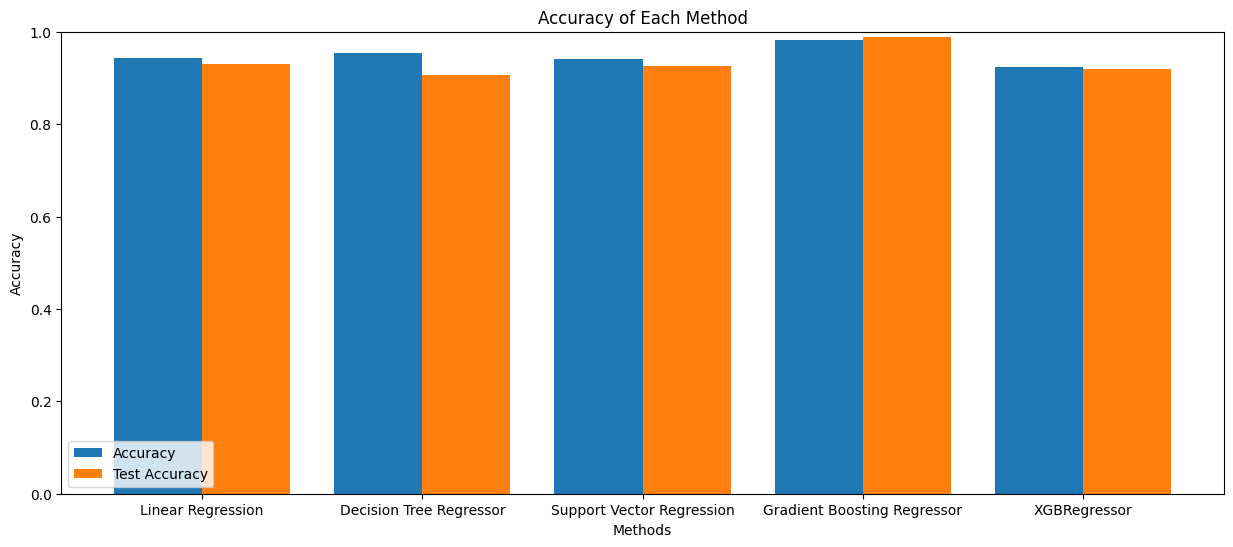

In [165]:
fig = plt.figure(figsize = (15, 6))
x = []
y1 = []
y2 = []
for meth in comparison.keys():
    x.append(meth)    
    y1.append(comparison[meth]['Accuracy'])
    y2.append(comparison[meth]['TestAccuracy'])
    

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y1, 0.4, label = 'Accuracy')
plt.bar(x_axis + 0.2, y2, 0.4, label = 'Test Accuracy')

plt.ylim([0,1])
plt.xticks(x_axis, x)

plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Accuracy of Each Method")
plt.legend(loc='lower left')
plt.show()